This notebook creates all the figures in the manuscript.
In order to run it, it will be necessary to already have run the script 'simulations.py' for all the parameter sets and have their csv products in the same folder

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from rev_lib import *

Initiate parameters

In [2]:
def get_confidence(y):
    y = np.array(y)
    yt = y.transpose()
    
    mean= np.mean(y,axis=0) 
    under95 = [np.percentile(d,2.5) for d in yt]
    under50 = [np.percentile(d,25) for d in yt]
    median  = [np.percentile(d,50) for d in yt]
    upper50 = [np.percentile(d,75) for d in yt]
    upper95 = [np.percentile(d,97.5) for d in yt]
    return mean,under95,under50,median,upper50,upper95
    

def plot_confidence(ax,mean,under95,under50,median,upper50,upper95,label=True):
    x = np.arange(mean.size)
    if label:
        ax.plot(mean,color='r',label='Mean')
        ax.plot(median,color='k',label='Median')
        ax.fill_between(x,under95,under50,color='b',alpha=.25, label = '95% Credible interval')
        ax.fill_between(x,under50,upper50,color='b',alpha=.5,label = '50% Credible interval')
        ax.fill_between(x,upper50,upper95,color='b',alpha=.25)
    else:
        ax.plot(mean,color='r')
        ax.plot(median,color='k')
        ax.fill_between(x,under95,under50,color='b',alpha=.25)
        ax.fill_between(x,under50,upper50,color='b',alpha=.5)
        ax.fill_between(x,upper50,upper95,color='b',alpha=.25)

**Cynical model -- main text**

In [3]:
gl = params(10,5,3,'c')

Marginalized

In [4]:
rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))

In [5]:
x = np.array(1-rho_cf)
xt = x.transpose()
median_f  = np.array([np.percentile(d,50) for d in xt])
upper95_f = np.array([np.percentile(d,97.5) for d in xt])    

y = np.array(rho_cr)
yt = y.transpose()
median_r  = np.array([np.percentile(d,50) for d in yt])
upper95_r = np.array([np.percentile(d,97.5) for d in yt])

cf05,cf50 = (median_f<.05).argmax(),(upper95_f<.5).argmax()
cr05,cr50 = (median_r<.05).argmax(),(upper95_r<.5).argmax()

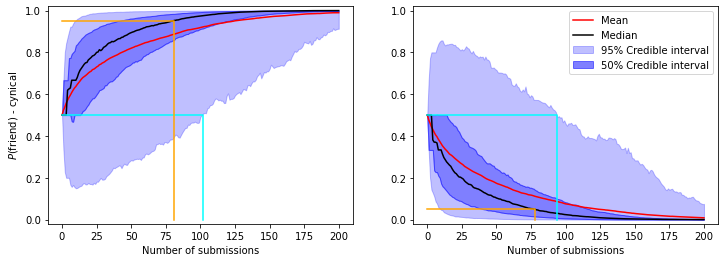

In [6]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

plot_confidence(ax[0],*get_confidence(rho_cf))
ax[0].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[0].set_xlabel('Number of submissions')
ax[0].set_ylim([-.02,1.02])
ax[0].plot([0,cf50,cf50],[.5,.5,0],color='cyan')
ax[0].plot([0,cf05,cf05],[.95,.95,0],color='orange')

plot_confidence(ax[1],*get_confidence(rho_cr))
#ax[1].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[1].set_xlabel('Number of submissions')
ax[1].set_ylim([-.02,1.02])
ax[1].plot([0,cr50,cr50],[.5,.5,0],color='cyan')
ax[1].plot([0,cr05,cr05],[.05,.05,0],color='orange')

plt.legend()
plt.savefig('rho_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

MAP

In [7]:
mp = pd.read_csv('map_{}.csv'.format(gl.suffix))

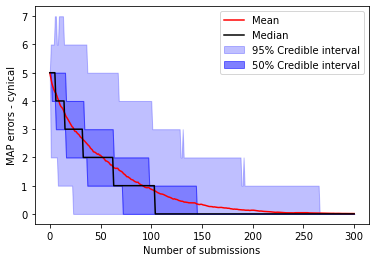

In [8]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(mp))

ax.set_ylabel('MAP errors - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('map_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

Entropy

In [9]:
S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))

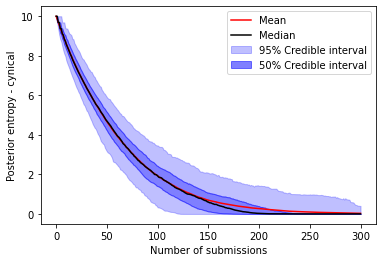

In [10]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(S))

ax.set_ylabel(r'Posterior entropy - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('entropy_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

Third conf

In [11]:
prob3 = pd.read_csv('prob3_{}.csv'.format(gl.suffix))
prob3 = prob3.to_numpy()

In [12]:
x = np.array(prob3)
xt = x.transpose()
median_3  = np.array([np.percentile(d,50) for d in xt])
low_3 = np.array([np.percentile(d,2.5) for d in xt])    


c50,c05 = (median_3>.95).argmax(),(low_3>.5).argmax()
#(median_r>.05).argmax(),(upper95_r<.5).argmax()
c50,c05

(78, 43)

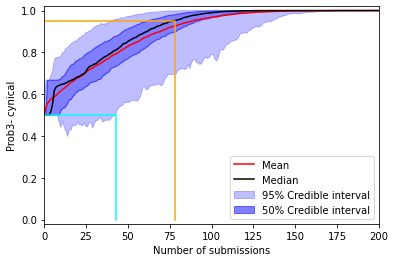

In [13]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(prob3))
ax.plot([0,c05,c05],[.5,.5,0],color='cyan')
ax.plot([0,c50,c50],[.95,.95,0],color='orange')
ax.set_ylim([-.02,1.02])
ax.set_xlim([0,200])

ax.set_ylabel(r'Prob3- {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('prob3_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

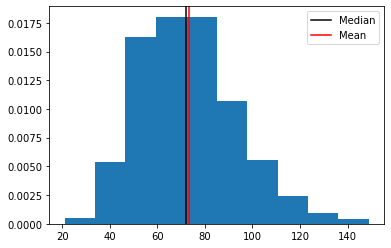

In [14]:
p3nums = np.array([(p3<.95).argmin() for p3 in prob3])
plt.hist(p3nums,density=True)
plt.axvline(np.median(p3nums),color='k',label='Median')
plt.axvline(np.mean(p3nums),color='r',label='Mean')
plt.legend()

**Quality model -- main text**

In [15]:
gl = params(10,5,3,'q')

Marginalized

In [16]:
rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))

In [17]:
x = np.array(1-rho_cf)
xt = x.transpose()
median_f  = np.array([np.percentile(d,50) for d in xt])
upper95_f = np.array([np.percentile(d,97.5) for d in xt])    

y = np.array(rho_cr)
yt = y.transpose()
median_r  = np.array([np.percentile(d,50) for d in yt])
upper95_r = np.array([np.percentile(d,97.5) for d in yt])

cf05,cf95 = (median_f<.05).argmax(),(upper95_f<.5).argmax()
cr05,cr95 = (median_r<.05).argmax(),(upper95_r<.5).argmax()

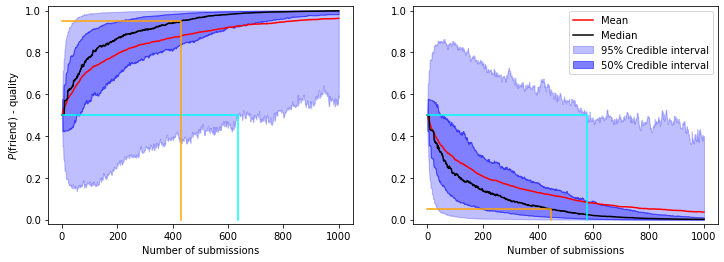

In [18]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

plot_confidence(ax[0],*get_confidence(rho_cf))
ax[0].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[0].set_xlabel('Number of submissions')
ax[0].set_ylim([-.02,1.02])
ax[0].plot([0,cf95,cf95],[.5,.5,0],color='cyan')
ax[0].plot([0,cf05,cf05],[.95,.95,0],color='orange')

plot_confidence(ax[1],*get_confidence(rho_cr))
#ax[1].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[1].set_xlabel('Number of submissions')
ax[1].set_ylim([-.02,1.02])
ax[1].plot([0,cr95,cr95],[.5,.5,0],color='cyan')
ax[1].plot([0,cr05,cr05],[.05,.05,0],color='orange')

plt.legend()
plt.savefig('rho_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

MAP

In [19]:
mp = pd.read_csv('map_{}.csv'.format(gl.suffix))

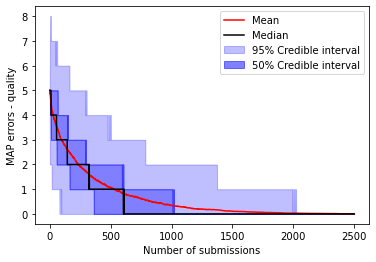

In [20]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(mp))

ax.set_ylabel('MAP errors - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('map_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

Entropy

In [21]:
S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))

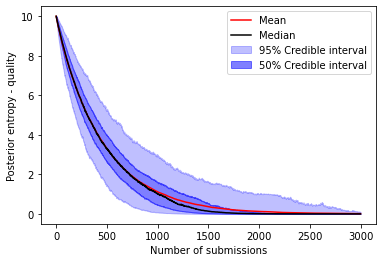

In [22]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(S))

ax.set_ylabel(r'Posterior entropy - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('entropy_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

Third conf

In [23]:
prob3 = pd.read_csv('prob3_{}.csv'.format(gl.suffix))
prob3 = prob3.to_numpy()

In [24]:
x = np.array(prob3)
xt = x.transpose()
median_3  = np.array([np.percentile(d,50) for d in xt])
low_3 = np.array([np.percentile(d,2.5) for d in xt])    


c50,c05 = (median_3>.95).argmax(),(low_3>.5).argmax()
#(median_r>.05).argmax(),(upper95_r<.5).argmax()

In [25]:
x = np.array(prob3)
xt = x.transpose()
median_3  = np.array([np.percentile(d,50) for d in xt])
low95_3 = np.array([np.percentile(d,2.5) for d in xt])    


(median_3>.95).argmax(),(low95_3>.5).argmax()

(441, 147)

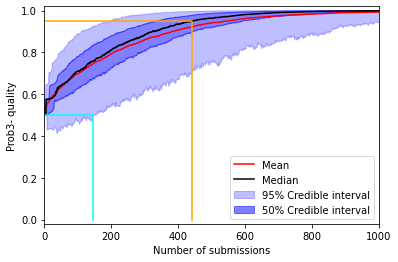

In [26]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(prob3))
ax.plot([0,c05,c05],[.5,.5,0],color='cyan')
ax.plot([0,c50,c50],[.95,.95,0],color='orange')
ax.set_ylim([-.02,1.02])
ax.set_xlim([0,1000])

ax.set_ylabel(r'Prob3- {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('prob3_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.show()

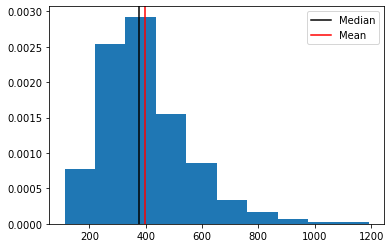

In [27]:
p3nums = np.array([(p3<.95).argmin() for p3 in prob3])
plt.hist(p3nums,density=True)
plt.axvline(np.median(p3nums),color='k',label='Median')
plt.axvline(np.mean(p3nums),color='r',label='Mean')
plt.legend()

**SI - A**

In [28]:
c_pas = [params(10,5,3,'c'), #cynical model
         params(10,7,3,'c'), #cynical with 7 friends
         params(10,9,3,'c')] #cynical with 9 friends
q_pas = [params(10,5,3,'q'), #quality model
         params(10,7,3,'q'), #quality with 7 friends
         params(10,9,3,'q')] #quality with 9 friends

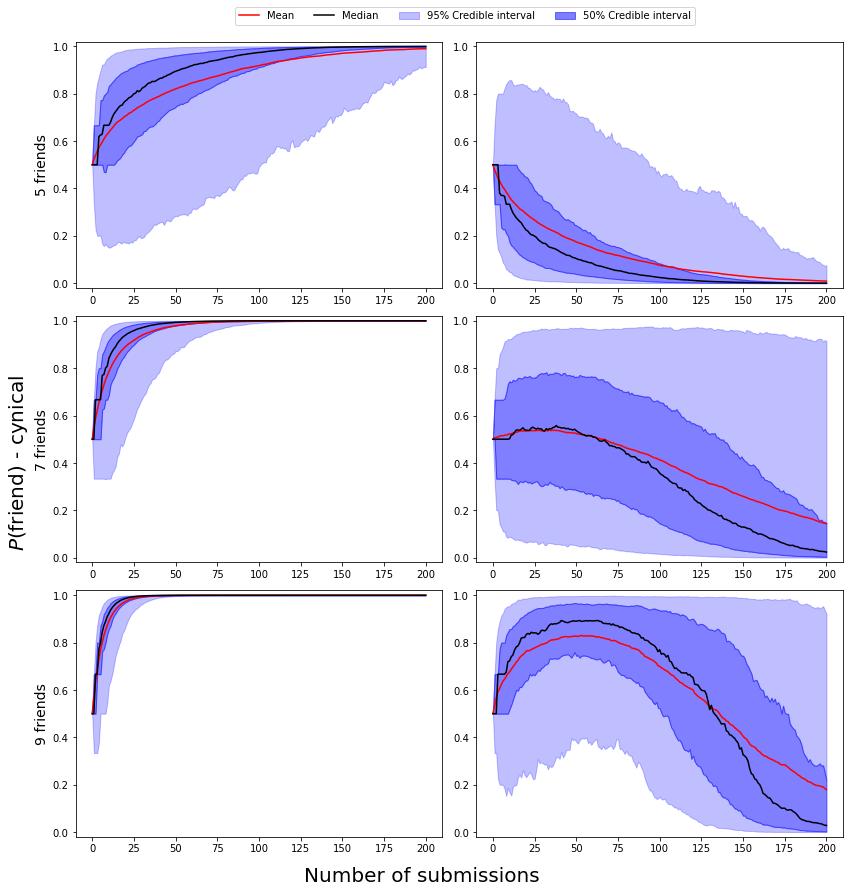

In [29]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,c_pas):
    rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
    plot_confidence(axi[0],*get_confidence(rho_cf),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    label_mark=False

    rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))
    plot_confidence(axi[1],*get_confidence(rho_cr),label=label_mark)
    axi[1].set_ylim([-.02,1.02])
    
    axi[0].set_ylabel(r'{} friends'.format(gl.ground.sum()),size=14)
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'$P($friend$)$ - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.tight_layout()
plt.savefig('rho_different_friends_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

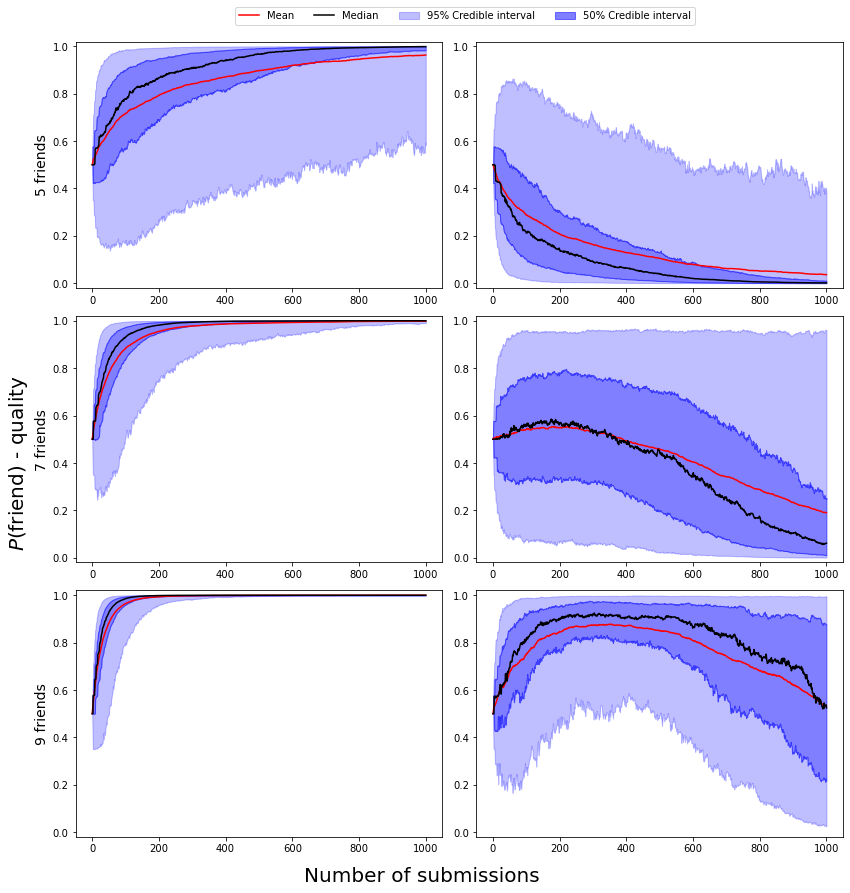

In [30]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,q_pas):
    rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
    plot_confidence(axi[0],*get_confidence(rho_cf),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    label_mark=False

    rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))
    plot_confidence(axi[1],*get_confidence(rho_cr),label=label_mark)
    axi[1].set_ylim([-.02,1.02])
    
    axi[0].set_ylabel(r'{} friends'.format(gl.ground.sum()),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'$P($friend$)$ - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)


fig.tight_layout()
plt.savefig('rho_different_friends_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

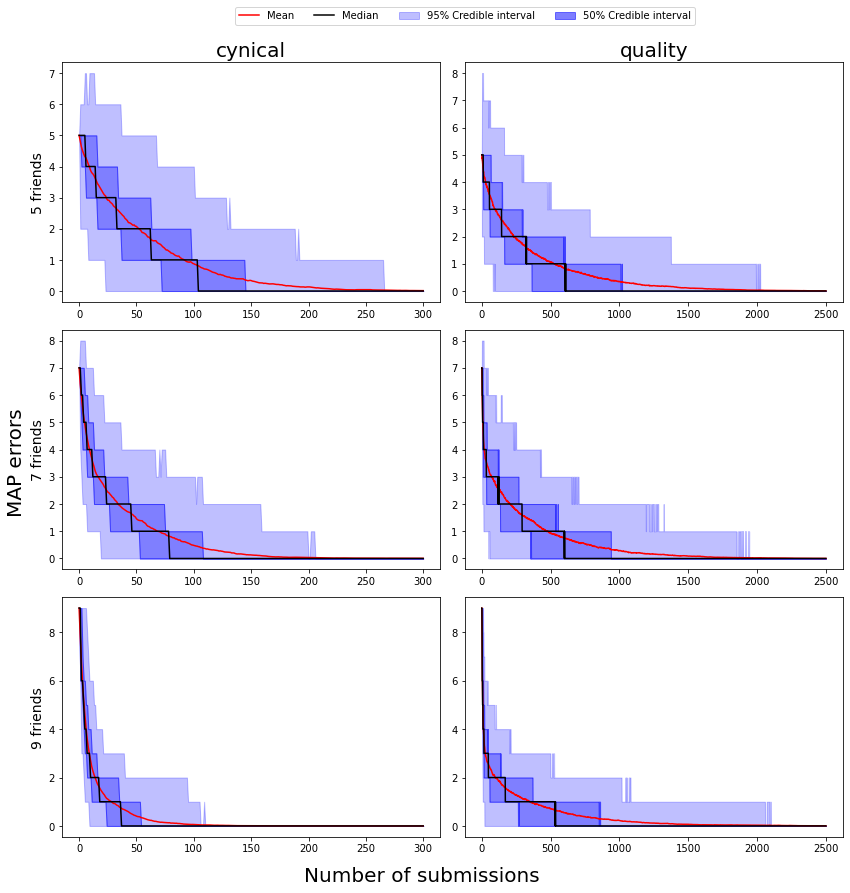

In [31]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,glc,glq) in zip(ax,c_pas,q_pas):
    mpc = pd.read_csv('map_{}.csv'.format(glc.suffix))
    plot_confidence(axi[0],*get_confidence(mpc),label=label_mark)
    
    label_mark = False

    mpq = pd.read_csv('map_{}.csv'.format(glq.suffix))
    plot_confidence(axi[1],*get_confidence(mpq),label=label_mark)

    axi[0].set_ylabel(r'{} friends'.format(glc.ground.sum()),size=14)
    
for (axi,name) in zip(ax[0],['cynical','quality']):
    axi.set_title('{}'.format(name),size=20)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'MAP errors',size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.tight_layout()
plt.savefig('map_different_friends.png',dpi=300,bbox_inches="tight")

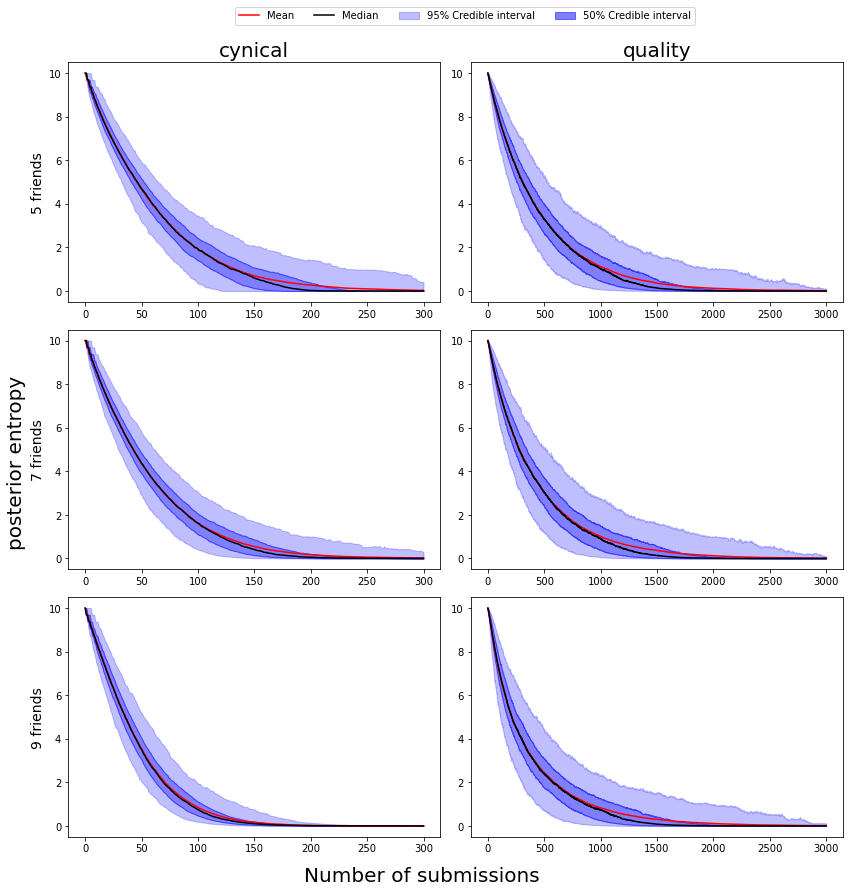

In [32]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,glc,glq) in zip(ax,c_pas,q_pas):
    Sc = pd.read_csv('entropy_{}.csv'.format(glc.suffix))
    plot_confidence(axi[0],*get_confidence(Sc),label=label_mark)
    
    label_mark = False

    Sq = pd.read_csv('entropy_{}.csv'.format(glq.suffix))
    plot_confidence(axi[1],*get_confidence(Sq),label=label_mark)

    axi[0].set_ylabel(r'{} friends'.format(glc.ground.sum()),size=14)
    
for (axi,name) in zip(ax[0],['cynical','quality']):
    axi.set_title('{}'.format(name),size=20)
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'posterior entropy',size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)
fig.tight_layout()
plt.savefig('entropy_different_friends.png',dpi=300,bbox_inches="tight")

**SI - C**

In [33]:
q_tables = [[params(10,5,3,'q',.6875,2.0625),params(10,5,3,'q',4.4375,13.3125),params(10,5,3,'q',9.125,27.375)],
            [params(10,5,3,'q',2,2),         params(10,5,3,'q'),               params(10,5,3,'q',24.5,24.5)   ],
            [params(10,5,3,'q',2.0625,.6875),params(10,5,3,'q',13.3125,4.4375),params(10,5,3,'q',27.375,9.125)]]
cols = [.05,.01,.005]
rows = [.25,.5,.75]

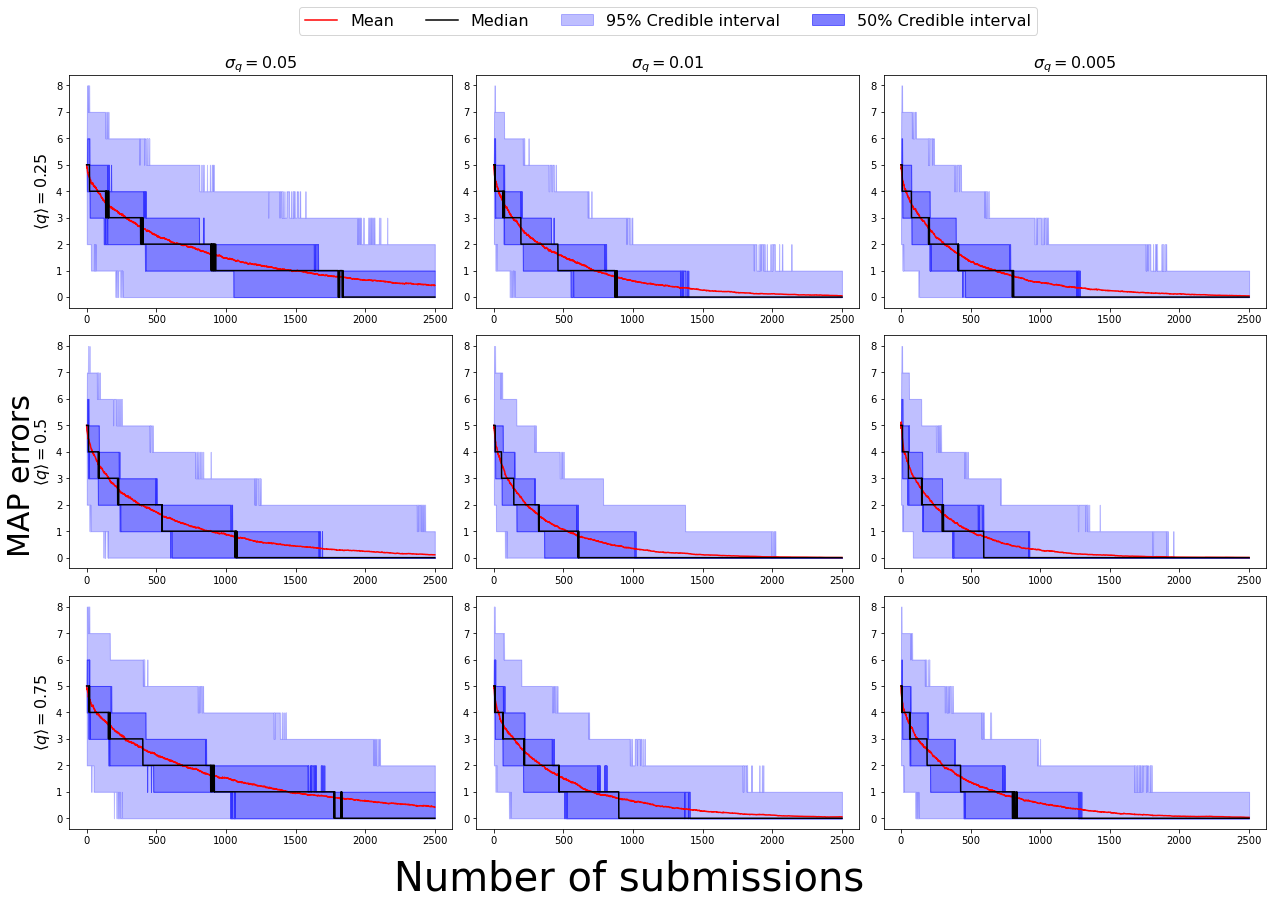

In [34]:
fig,ax=plt.subplots(3,3,figsize=(6*3,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,q_tables):
    for (axj,gl) in zip(axi,gl_line):
        mp = pd.read_csv('map_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(mp),label=label_mark)
        label_mark = False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=16)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.53,1.001),fontsize=16)
fig.supylabel(r'MAP errors'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=40)
fig.tight_layout()
plt.savefig('map_different_qualities.png',dpi=150,bbox_inches="tight")

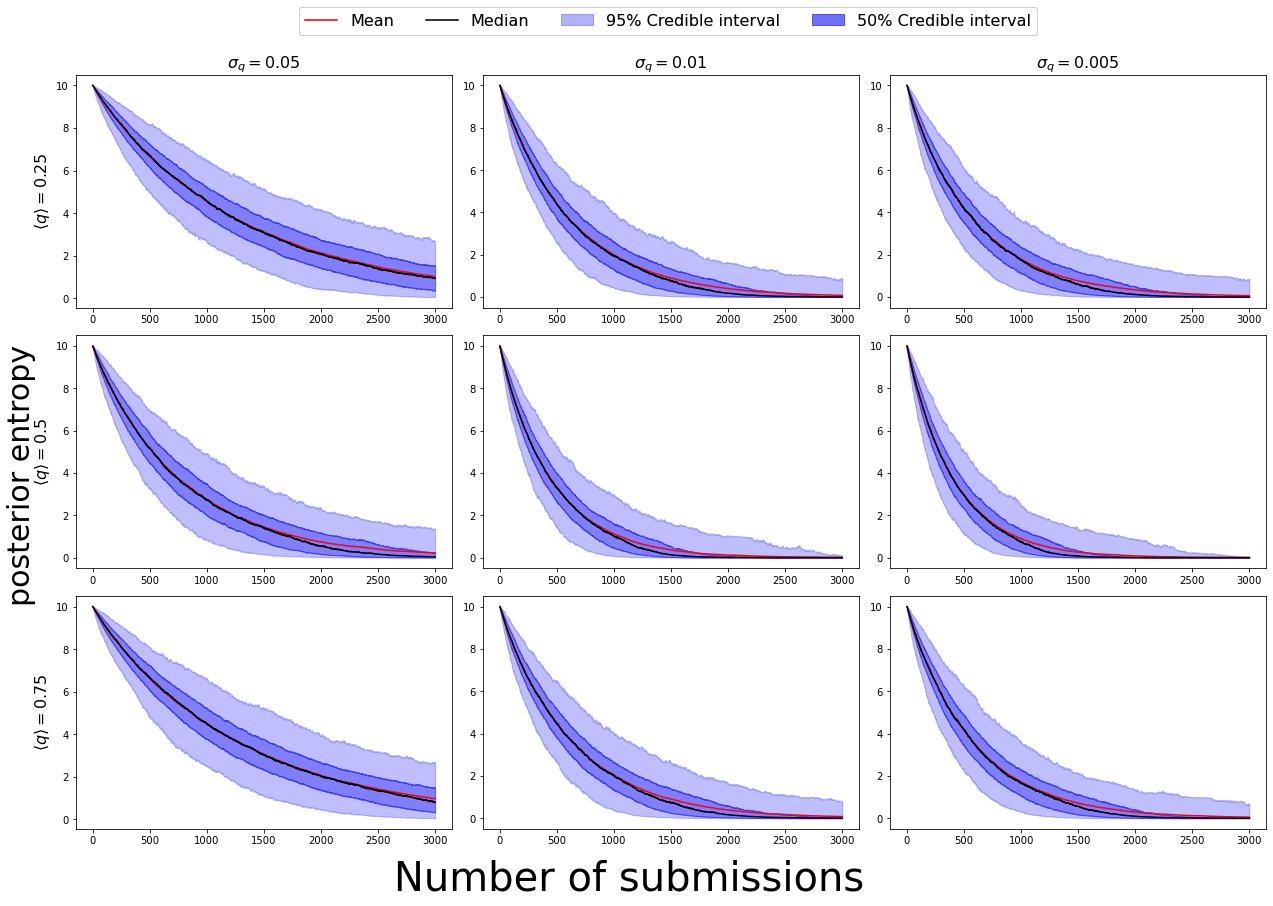

In [35]:
fig,ax=plt.subplots(3,3,figsize=(6*3,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,q_tables):
    for (axj,gl) in zip(axi,gl_line):
        S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(S),label=label_mark)
        label_mark = False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=16)

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.53,1.001),fontsize=16)
fig.supylabel(r'posterior entropy'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=40)
fig.tight_layout()
plt.savefig('entropy_different_qualities.png',dpi=150,bbox_inches="tight")

In [36]:
del_tables = [[params(10,5,3,'q',4.4375,13.3125),params(10,5,3,'q',1,3,delta=True)],
              [params(10,5,3,'q'),               params(10,5,3,'q',1,1,delta=True)],
              [params(10,5,3,'q',13.3125,4.4375),params(10,5,3,'q',3,1,delta=True)]]
del_cols = [.01,0]
del_rows = [.25,.5,.75]

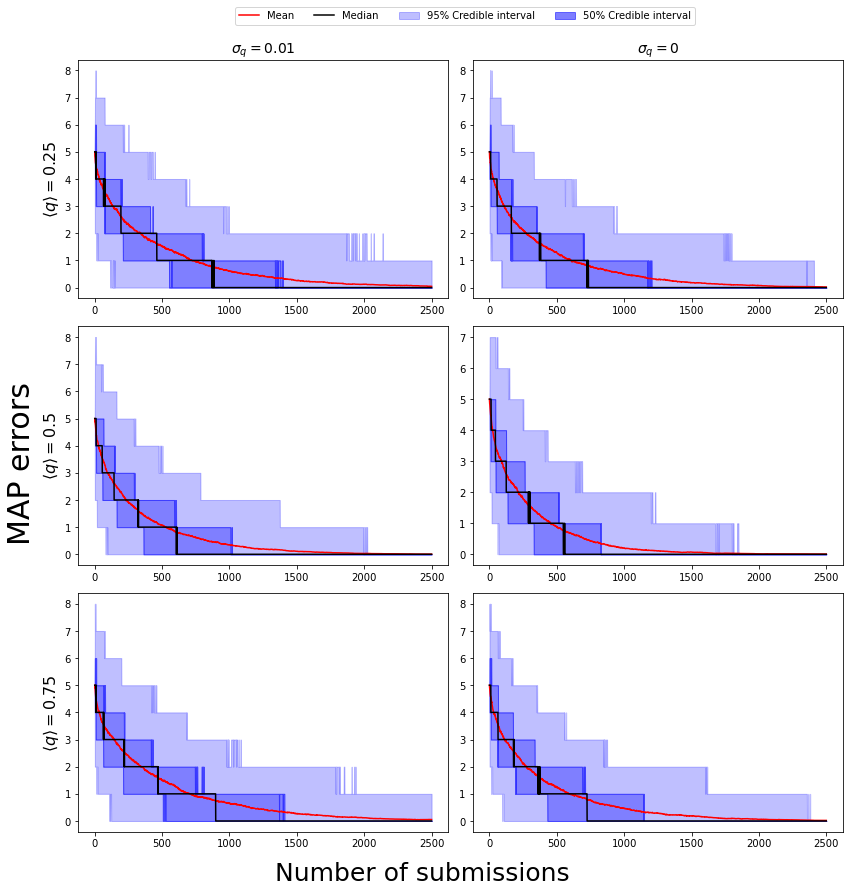

In [37]:
fig,ax=plt.subplots(3,2,figsize=(6*2,4*3))

label_mark = True
for (row,axi,gl_line) in zip(rows,ax,del_tables):
    for (axj,gl) in zip(axi,gl_line):
        mp = pd.read_csv('map_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(mp),label=label_mark)
        label_mark = False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(del_cols,ax[0],del_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'MAP errors'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=25)
fig.tight_layout()
plt.savefig('map_delta_comparison.png',dpi=300,bbox_inches="tight")

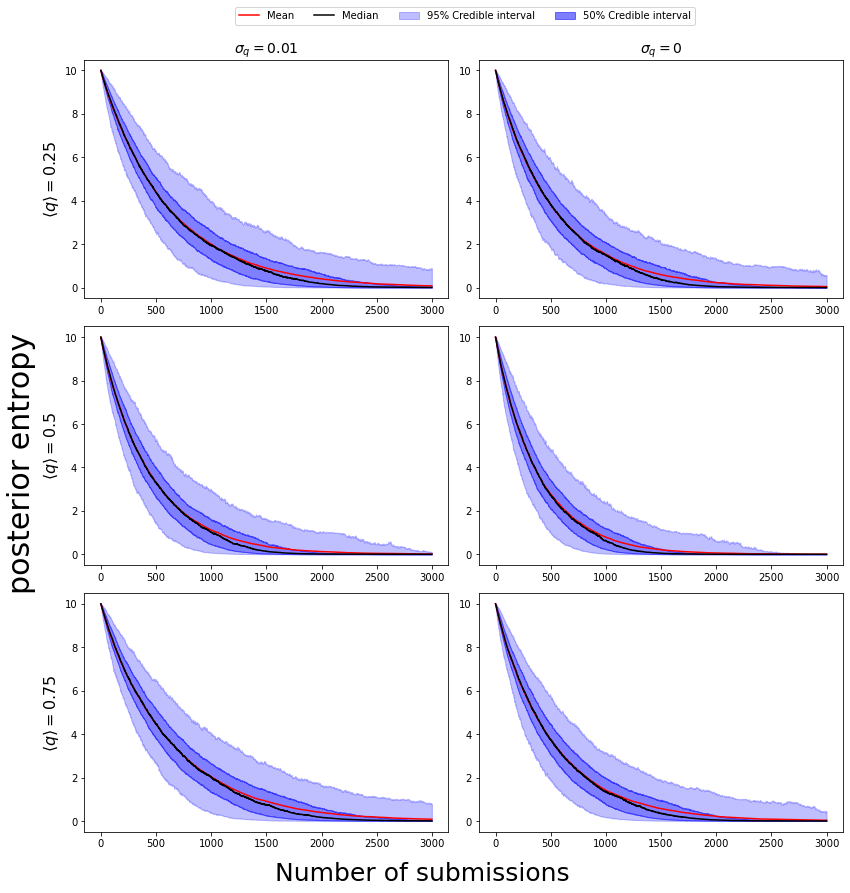

In [38]:
fig,ax=plt.subplots(3,2,figsize=(6*2,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,del_tables):
    for (axj,gl) in zip(axi,gl_line):
        S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(S),label=label_mark)
        label_mark= False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(del_cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'posterior entropy'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=25)
fig.tight_layout()
plt.savefig('entropy_delta_comparison.png',dpi=300,bbox_inches="tight")

In [39]:
l =[(1,2),(2,3),(3,4)]

In [40]:
np.array(l)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [41]:
pd.DataFrame(l,columns=['a','b'])

,a,b
0,1,2
1,2,3
2,3,4
